# <center> Data Science 1 - Final Assignment <center>
<center>Created by Zsófia Rebeka Katona<center>

    ---

The goal of this assignment is to explore the concepts of ridge regression and principal component analysis (PCA) in the context of predictive modeling. We'll examine two exercises:

1. Ridge Regression Analysis:

- We begin by considering a simple predictive model where the response variable is predicted using only a constant term. We then introduce ridge regression, which is a regularized version of linear regression, and compare its performance with ordinary least squares (OLS) regression.
- We generate a sample dataset with a known true parameter and noise distribution. Using this dataset, we compute ridge regression estimates for various values of the regularization parameter lambda (λ) and analyze the bias, variance, and mean squared error (MSE) of these estimates.
- Finally, we plot the bias, variance, and MSE as functions of lambda to interpret the results and determine whether ridge regression provides better predictions than OLS regression.

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## 1. Ridge Regression Analysis

In [51]:
# Setting the random seed
np.random.seed(20240315)

# Settings
n = 20
sigma = 1.0
beta_zero = 2
epsilon = np.random.normal(loc = 0, scale = sigma, size = n)
Y = beta_zero + epsilon

# Creating the estimator for the OLS model
beta_ols = np.mean(Y)

# Define the Ridge Estimator functrion
def ridge_estimator(n, alpha):
    n = len(Y)
    return np.sum(Y)/(n + alpha)

# Define a nonzero lambda
alpha_ridge = 3.0

# Calculating the Ridge Estimator
beta_ridge = ridge_estimator(n, alpha_ridge)

# Comparing the two values
print(f"The OLS Estimator is {beta_ols}")
print(f"The Ridge Estimator is {beta_ridge}, when lambda is {alpha_ridge}")

The OLS Estimator is 2.0127181593375885
The Ridge Estimator is 1.750189703771816, when lambda is 3.0


#### a, How does the regularized estimator (predictor) βˆridge compare with the OLS estimator?
- The Ridge Estimator is expected to be smaller as we apply a penalty term and the coefficient will be be smaller. 
- The penalty term shrinks the coefficients close to 0. Introducing a penalty term results in a shinkrage effect on the coefficient estimates.
- The higher the penalty term, the more the coefficients shrink towards 0.

#### b, Suppose that β0 = 1 and ϵ ∼ N(0, σ2) with σ2 = 4. Generate a sample of size n = 20 from the model and compute the predicted value Yˆ = ˆf(x) = βˆridge 0 for a grid of λ values over the interval [0, 20].

In [52]:
# Settings for exercise b
sigma = 2
epsilon = np.random.normal(loc = 0, scale = sigma**2, size = n)

Y = beta_ridge + epsilon

# Setting the lambda from 0 to 20 with increments of 0.5
alphas_to_try = np.arange(0.5, 20, 0.5)

# Creating an empty array
results = []

# Defining a for loop to calculate the estimated values
for alpha in alphas_to_try:
    beta_ridge = ridge_estimator(n, alpha)
    results.append(beta_ridge)

# Creating a DataFrame to display the values
alpha_results = pd.DataFrame({
    "Alphas" : alphas_to_try,
    "Estimated values" : results
})

alpha_results

,Alphas,Estimated values
0,0.5,2.387243
1,1.0,2.330404
2,1.5,2.276209
3,2.0,2.224477
4,2.5,2.175044
5,3.0,2.127760
6,3.5,2.082489
7,4.0,2.039103
8,4.5,1.997489
9,5.0,1.957539


#### c,  Repeat part b), say, 1000 times so that you end up with 1000 estimates of β0 for all the λ values that you have picked. For each value of λ, compute bias2 [βˆridge0], Var[βˆridge0] and MSE[βˆridge0] = bias2[βˆridge0] + Var[βˆridge0].

In [64]:
R = 1000
epsilon = np.random.normal(loc = 0, scale = sigma, size = (R, n))

# Creating empty arrays to store the results
estimated_results = np.empty((R, len(alphas_to_try)))
bias_sq = np.empty(len(alphas_to_try))
var = np.empty(len(alphas_to_try))
mse = np.empty(len(alphas_to_try))

# Creating a for loop for the 1000 estimates
# The 'i' stands for the number of iterations and j represents the lambas' index
for i in range(R):
    epsilon = np.random.normal(0, sigma, size = n)
    Y = beta_zero + epsilon
    for j, alpha in enumerate(alphas_to_try):
        beta_ridge = ridge_estimator(n, alpha)
        estimated_results[i, j] = beta_ridge
results
    
# Calculating the bias squared, variance and mse results
bias = np.mean(estimated_results - beta_zero, axis = 0)

# Calculate the mean of estimated_results
estimated_mean = np.mean(estimated_results, axis=0)

# Calculate the variance using the formula
variance = np.mean((estimated_results - estimated_mean) ** 2, axis=0)

mse = np.mean(((estimated_results - beta_zero)**2), axis = 0)
bias, variance, mse

(array([-0.06605947, -0.11210567, -0.15601019, -0.19791905, -0.23796529,
        -0.27627039, -0.31294549, -0.34809246, -0.38180486, -0.41416876,
        -0.44526349, -0.47516227, -0.50393279, -0.53163774, -0.55833524,
        -0.58407925, -0.60891997, -0.63290411, -0.65607522, -0.67847397,
        -0.70013833, -0.72110384, -0.74140378, -0.76106935, -0.78012982,
        -0.7986127 , -0.81654385, -0.83394762, -0.85084693, -0.8672634 ,
        -0.88321744, -0.89872831, -0.91381422, -0.92849241, -0.94277917,
        -0.95668998, -0.97023946, -0.98344151, -0.99630934]),
 array([0.19003447, 0.18109294, 0.17276795, 0.1650041 , 0.15775207,
        0.15096783, 0.14461201, 0.13864928, 0.13304787, 0.12777918,
        0.12281735, 0.11813903, 0.11372301, 0.10955005, 0.10560262,
        0.10186478, 0.09832193, 0.09496074, 0.09176901, 0.08873554,
        0.08585002, 0.083103  , 0.08048575, 0.07799022, 0.07560898,
        0.07333516, 0.07116238, 0.06908476, 0.06709682, 0.06519346,
        0.06336995,

<function matplotlib.pyplot.show(close=None, block=None)>

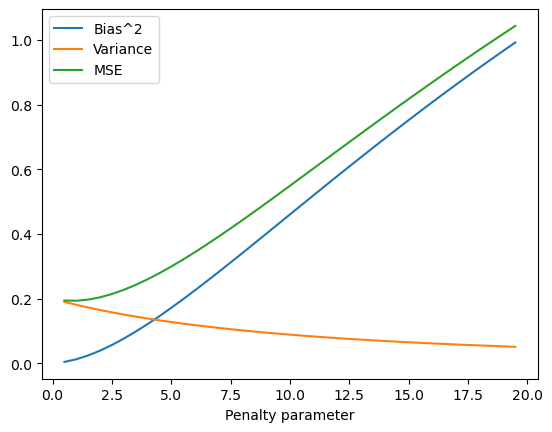

In [65]:
import matplotlib.pyplot as plt
plt.plot(alphas_to_try, bias**2, label = "Bias^2")
plt.plot(alphas_to_try, variance, label = "Variance")
plt.plot(alphas_to_try, mse, label = "MSE")
plt.xlabel('Penalty parameter')
plt.legend()
plt.show

## 2. Linear regression
 Suppose we estimate the regression coefficients in a linear regression
model by minimizing the function provided for a particular value of s. For parts (a) through (e), indicate which
of i. through v. is correct. Justify your answer.

- (a) As we increase s from 0, the training RSS will:
    - i. Increase initially, and then eventually start decreasing in an inverted U shape.
    - ii. Decrease initially, and then eventually start increasing in a U shape.
    - iii. Steadily increase.
    - iv. Steadily decrease.
    - v. Remain constant.
- (b) Repeat (a) for test RSS.
- (c) Repeat (a) for variance.
- (d) Repeat (a) for (squared) bias.
- (e) Repeat (a) for the irreducible error.

---

Objective:

The exercise aims to understand how the training residual sum of squares (RSS), test RSS, variance, squared bias, and irreducible error change as we vary the regularization parameter s in a linear regression model.
Linear Regression with Regularization:

In a linear regression model, we aim to minimize the difference between observed and predicted values of the response variable (RSS). However, in this exercise, we impose a constraint on the magnitude of the regression coefficients (β) such that the sum of absolute values of coefficients does not exceed a certain threshold s.
Effect of Increasing s:

As s increases from 0, the constraint becomes less restrictive, allowing larger coefficient values.

Let's analyze the expected behavior for each of the metrics:

(a) Training RSS: Initially, with a small s, the model is heavily regularized, leading to underfitting and higher training RSS. As s increases, the model becomes less regularized, fitting the training data better, and thus training RSS decreases. However, if s becomes too large, overfitting may occur, causing the training RSS to increase again.

(b) Test RSS: The test RSS typically follows a similar pattern to the training RSS. Initially, with a small s, the model generalizes poorly to unseen data, leading to high test RSS. As s increases, the model becomes better at generalizing, resulting in lower test RSS. However, if s becomes too large, overfitting may occur, causing test RSS to increase again.

(c) Variance: Variance tends to decrease as s increases because the model becomes less complex and more stable.

(d) Squared Bias: Bias tends to decrease initially as s increases because the model becomes more flexible and can capture more complex relationships in the data. However, if s becomes too large, bias may increase due to overfitting.

(e) Irreducible Error: Irreducible error remains constant regardless of the value of s because it represents the inherent noise in the data that cannot be reduced by any model.

Conclusion:

In summary, as we increase s from 0:
Training RSS and test RSS are expected to initially increase and then decrease or remain relatively stable, depending on the balance between model flexibility and overfitting.
Variance is expected to decrease.
Bias is expected to decrease initially and then may increase if overfitting occurs.
Irreducible error remains constant.
This exercise helps in understanding the trade-offs involved in choosing the appropriate level of regularization in a linear regression model and its impact on various aspects of model performance.

## 3. Principal Component Analysis (PCA):

- We then move on to the second exercise, which involves a dense regression model with 50 correlated predictors.
Using PCA, we compute the principal components of the predictors and their corresponding scores.
- We estimate OLS regression models using both the original predictors and the principal components on a training sample. Then, we use these models to predict the outcomes in a test sample and compute the mean squared prediction error (MSPE) for comparison.
- Finally, we discuss and explain the patterns observed in the MSPE for different sample sizes in comparison with a reference table provided in lecture slides.

<function matplotlib.pyplot.show(close=None, block=None)>

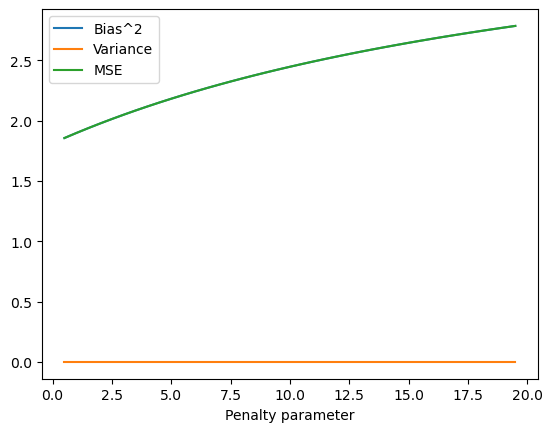

In [48]:
import matplotlib.pyplot as plt
plt.plot(alphas_to_try, bias_sq, label = "Bias^2")
plt.plot(alphas_to_try, variance, label = "Variance")
plt.plot(alphas_to_try, mse, label = "MSE")
plt.xlabel('Penalty parameter')
plt.legend()
plt.show